In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score

/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harrisoneighty7_gmail_com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
models_list = pd.read_csv('models_list.csv')

### Plot ROC Curves

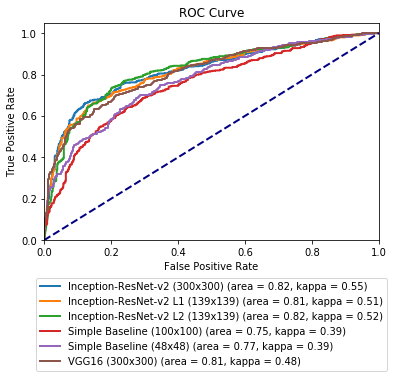

In [3]:
plt.figure()
lw = 2

for index, row in models_list.iterrows():
    
    model_name = row.Model_Name
    model_name_short = row.Model_Name_Short
    roc_curve_df = pd.read_csv('./roc_curve_data/roc_curve_' + model_name + '.csv')
    
    false_positive_rate = roc_curve_df.FalsePositive
    true_positive_rate = roc_curve_df.TruePositive
    auc = roc_curve_df.AUC[0]
    cohens_kappa = roc_curve_df.CohensKappa[0]

    plt.plot(false_positive_rate, true_positive_rate,
             lw=lw, label=model_name_short+' (area = %0.2f' % auc +', kappa = %0.2f)' % cohens_kappa)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
plt.show()

### Calculate Site-wise Performance

In [85]:
def calc_sitewise_performance(model_name):
    
    plt.figure()
    lw = 2
    
    model_name_short = models_list[models_list.Model_Name==model_name].Model_Name_Short.values[0]
    
    studies_summary = pd.read_csv('./studies_summaries/'+model_name+'.csv')
    sites = studies_summary.groupby(["Site"], as_index=False).count()["Site"]
    site_list = list(sites)
    
    acc_list = []
    auc_list  = []
    kappa_list = []
    
    # Sitewise Results
    for site in site_list:
        num_studies = len(studies_summary[studies_summary.Site==site])
        pred_prob_abnormal = studies_summary[studies_summary.Site==site].PredProbAbnormal
        pred_labels = studies_summary[studies_summary.Site==site].PredLabel
        true_labels = studies_summary[studies_summary.Site==site].StudyOutcome
        
        acc = sum(true_labels==pred_labels)/num_studies
        auc = roc_auc_score(y_true=true_labels, y_score=pred_prob_abnormal)
        kappa = cohen_kappa_score(true_labels, pred_labels)
        
        # Plot ROC Curve
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=true_labels, y_score=pred_prob_abnormal)
        plt.plot(false_positive_rate, true_positive_rate,
                 lw=lw, label=site+' (area = %0.2f' % auc +', kappa = %0.2f)' % kappa)        
        
        acc_list.append(acc)
        auc_list.append(auc)
        kappa_list.append(kappa)
        
    # Aggregate Results
    num_studies = len(studies_summary)
    pred_prob_abnormal = studies_summary.PredProbAbnormal
    pred_labels = studies_summary.PredLabel
    true_labels = studies_summary.StudyOutcome

    acc = sum(true_labels==pred_labels)/num_studies
    auc = roc_auc_score(y_true=true_labels, y_score=pred_prob_abnormal)
    kappa = cohen_kappa_score(true_labels, pred_labels)

    # Plot ROC Curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=true_labels, y_score=pred_prob_abnormal)
    plt.plot(false_positive_rate, true_positive_rate,
             lw=lw, label='All (area = %0.2f' % auc +', kappa = %0.2f)' % kappa)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve by Site - ' + model_name_short)
    pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.15))
    plt.show()
    
    # Combine Results
    site_list.append("All")
    acc_list.append(acc)
    auc_list.append(auc)
    kappa_list.append(kappa)
    
    # Put into a dataframe
    results_df = pd.DataFrame({'Site':site_list
        , 'Accuracy':acc_list
        , 'AUC':auc_list
        , 'CohensKappa': kappa_list})
    
    return results_df


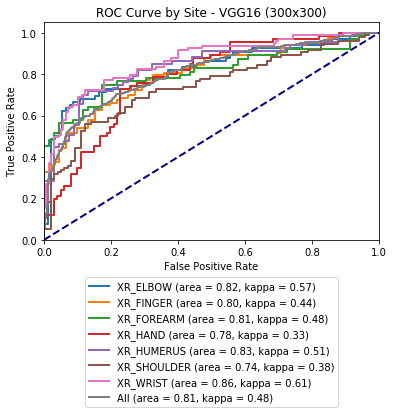

In [86]:
results = calc_sitewise_performance(model_name)

In [87]:
results

,Site,Accuracy,AUC,CohensKappa
0,XR_ELBOW,0.797468,0.822628,0.574554
1,XR_FINGER,0.725714,0.804610,0.442083
2,XR_FOREARM,0.744361,0.809330,0.482135
3,XR_HAND,0.700599,0.783828,0.327806
4,XR_HUMERUS,0.755556,0.834065,0.511031
5,XR_SHOULDER,0.690722,0.742052,0.379597
6,XR_WRIST,0.814346,0.864580,0.609877
7,All,0.748957,0.809346,0.483372


In [71]:
model_name

'VGG16_noweights_lr_2E-4_plateau_300_300'

In [84]:
model_name_short = models_list[models_list.Model_Name==model_name].Model_Name_Short.values[0]
model_name_short

'VGG16 (300x300)'

In [103]:
image_paths = pd.read_csv("valid_image_paths.csv", header=None)

In [104]:
filenames_valid = './valid/' + image_paths

In [105]:
filenames_valid

,0
0,./valid/MURA-v1.1/valid/XR_ELBOW/patient99999/...
1,./valid/MURA-v1.1/valid/XR_ELBOW/patient99999/...
2,./valid/MURA-v1.1/valid/XR_FINGER/patient99998...
3,./valid/MURA-v1.1/valid/XR_FINGER/patient99998...
4,./valid/MURA-v1.1/valid/XR_FOREARM/patient9999...
5,./valid/MURA-v1.1/valid/XR_FOREARM/patient9999...
6,./valid/MURA-v1.1/valid/XR_HAND/patient99996/s...
7,./valid/MURA-v1.1/valid/XR_HAND/patient99996/s...
8,./valid/MURA-v1.1/valid/XR_HUMERUS/patient9999...
9,./valid/MURA-v1.1/valid/XR_HUMERUS/patient9999...


In [106]:
filenames_valid = list(filenames_valid.loc[:][0])

In [108]:
filenames_valid[0]

'./valid/MURA-v1.1/valid/XR_ELBOW/patient99999/study1_positive/image1.png'

In [109]:
image_size = (139,150,3)

In [111]:
image_size[2]

3

In [114]:
a = image_size[0:2]

In [115]:
type(image_size)

tuple

In [116]:
type(a)

tuple

In [117]:
a

(139, 150)

In [118]:
image_paths

,0
0,MURA-v1.1/valid/XR_ELBOW/patient99999/study1_p...
1,MURA-v1.1/valid/XR_ELBOW/patient99999/study2_n...
2,MURA-v1.1/valid/XR_FINGER/patient99998/study1_...
3,MURA-v1.1/valid/XR_FINGER/patient99998/study2_...
4,MURA-v1.1/valid/XR_FOREARM/patient99997/study1...
5,MURA-v1.1/valid/XR_FOREARM/patient99997/study2...
6,MURA-v1.1/valid/XR_HAND/patient99996/study1_po...
7,MURA-v1.1/valid/XR_HAND/patient99996/study2_ne...
8,MURA-v1.1/valid/XR_HUMERUS/patient99995/study1...
9,MURA-v1.1/valid/XR_HUMERUS/patient99995/study2...


In [122]:
image_paths = pd.read_csv("valid_image_paths.csv", header=None)
image_paths = './valid/' + image_paths
image_paths = list(image_paths.loc[:][0])

In [126]:
num_images = len(image_paths)
dummy_labels = [[1,0]]*num_images

In [128]:
image_paths = pd.read_csv("valid_image_paths.csv", header=None)
image_paths = list(image_paths.loc[:][0])

In [164]:
study_paths = []
for path in image_paths:
    len_path = len(path)
    pos = path.find("/")
    study_path = path[:(len_path-pos-1)]
    study_paths.append(study_path)

In [165]:
len(study_paths)

14

In [166]:
study_paths_df = pd.DataFrame({"ImagePaths":image_paths, "StudyPaths":study_paths})

In [167]:
study_paths_df.StudyPaths[0]

'MURA-v1.1/valid/XR_ELBOW/patient99999/study1_positive/'

In [169]:
image_paths = pd.read_csv("valid_image_paths.csv", header=None)

In [171]:
image_paths["A"] = [1]*len(image_paths)

In [173]:
image_paths.drop(["A"], axis=1)

,0
0,MURA-v1.1/valid/XR_ELBOW/patient99999/study1_p...
1,MURA-v1.1/valid/XR_ELBOW/patient99999/study2_n...
2,MURA-v1.1/valid/XR_FINGER/patient99998/study1_...
3,MURA-v1.1/valid/XR_FINGER/patient99998/study2_...
4,MURA-v1.1/valid/XR_FOREARM/patient99997/study1...
5,MURA-v1.1/valid/XR_FOREARM/patient99997/study2...
6,MURA-v1.1/valid/XR_HAND/patient99996/study1_po...
7,MURA-v1.1/valid/XR_HAND/patient99996/study2_ne...
8,MURA-v1.1/valid/XR_HUMERUS/patient99995/study1...
9,MURA-v1.1/valid/XR_HUMERUS/patient99995/study2...


In [175]:
import numpy as np

In [179]:
np.zeros(10).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])